### Stock data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2001-1-01', end='2020-11-04')
bse_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...
2020-10-28,40664.351562,40664.351562,39774.601562,39922.460938,39922.460938,29400
2020-10-29,39537.171875,40010.828125,39524.250000,39749.851562,39749.851562,19500
2020-10-30,39779.820312,39988.250000,39241.871094,39614.070312,39614.070312,12000


In [3]:
bse_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...
2020-10-28,40664.351562,40664.351562,39774.601562,39922.460938,39922.460938,29400
2020-10-29,39537.171875,40010.828125,39524.250000,39749.851562,39749.851562,19500
2020-10-30,39779.820312,39988.250000,39241.871094,39614.070312,39614.070312,12000


In [4]:
bse_data.shape

(4888, 6)

In [5]:
bse_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Open price

In [6]:
import plotly.express as px
import plotly.graph_objects as go

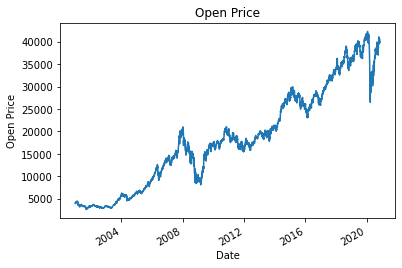

In [7]:
bse_data['Open'].plot()
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

Close price

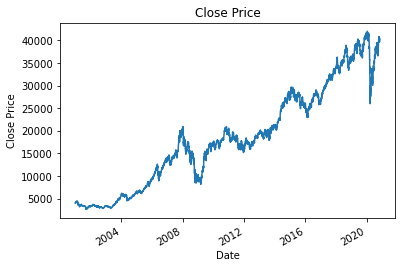

In [8]:
bse_data['Close'].plot()
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Headlines Data 

In [9]:
headlines = pd.read_csv('india-news-headlines.csv')

In [10]:
headlines.duplicated().sum()

21585

In [11]:
headlines = headlines.drop_duplicates()
headlines

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [12]:
headlines.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [13]:
headlines = headlines.filter(['publish_date','headline_text'])

In [14]:
headlines['publish_date'] = headlines['publish_date'].astype(str)
headlines['publish_date'] = headlines['publish_date'].apply(lambda x : x[0:4]+'-'+x[4:6]+'-'+x[6:])
headlines['publish_date'] = pd.to_datetime(headlines['publish_date']).dt.normalize()

In [15]:
headlines = headlines.groupby('publish_date')['headline_text'].apply(lambda x : ''.join(x)).reset_index()
headlines = headlines.rename(columns={"publish_date":"Date"})

In [16]:
headlines.set_index('Date',inplace=True)
headlines.sort_index()

,headline_text
Date,
2001-01-01,win over cena satisfying but defeating underta...
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,Powerless north India gropes in the darkThink ...
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
...,...
2020-06-26,Containment zone residents slam high prices ch...
2020-06-27,like me i wont let you have a toxic relationsh...
2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...


In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

for val in headlines.headline_text: 
    val = str(val)
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

NameError: name 'headlines' is not defined

### Merging databases

In [17]:
df_merge_col = pd.merge(bse_data, headlines, on='Date')
df_merge_col

,Open,High,Low,Close,Adj Close,Volume,headline_text
Date,,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the darkThink ...
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to Indi...
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class...
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the anteFrontrun...
...,...,...,...,...,...,...,...
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600,I never thought I had a voice until today: Vid...
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600,Truck firms look for new export markets to sel...
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800,Containment zone residents slam high prices ch...


### Sentiment Analysis

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()
df_merge_col['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_merge_col['headline_text']]
df_merge_col.head(5)

,Open,High,Low,Close,Adj Close,Volume,headline_text,compound
Date,,,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,-0.9621
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the darkThink ...,0.6322
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to Indi...,0.6648
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class...,0.9253
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the anteFrontrun...,-0.9638


In [20]:
df  = df_merge_col[[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'compound']]
df.head(25)

,Open,High,Low,Close,Adj Close,Volume,compound
Date,,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,-0.9621
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,0.6322
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,0.6648
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,0.9253
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,-0.9638
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0,-0.9559
2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0,-0.5719
2001-01-11,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0,0.0000
2001-01-23,4277.830078,4321.750000,4272.870117,4296.689941,4296.689941,0,0.9295


### Pre processing

In [21]:
import math
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout,Activation
from keras import losses 
from keras import optimizers 
from keras import metrics 

In [22]:
data = df.filter(['Close']).values
data = data[~np.isnan(data)]
data = np.reshape(data, (-1, 1)) 
training_len = math.ceil(len(data)*0.8)
training_len

3817

In [23]:
data

array([[ 4018.87988281],
       [ 4060.02001953],
       [ 4115.37011719],
       ...,
       [35171.26953125],
       [34961.51953125],
       [34915.80078125]])

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [25]:
scaled_data

array([[0.03605259],
       [0.03709801],
       [0.03850453],
       ...,
       [0.82767657],
       [0.82234654],
       [0.82118476]])

In [26]:
#Setting window size to be 60
train_data = scaled_data[0:training_len, :]

# Splitting into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train.shape

(3757, 60)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0],
                               X_train.shape[1], 1))
X_train.shape

(3757, 60, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]),activation = 'relu'))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 54,651
Trainable params: 54,651
Non-trainable params: 0
____________________________________________________

In [30]:
#history = model.fit(X_train,y_train, epochs=20, batch_size=10, validation_data=(X_test,y_test))

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs = 25)

Epoch 1/25


In [ ]:
model.save("model")

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing

In [67]:
import keras
model = keras.models.load_model("model")

In [49]:
test_data = scaled_data[training_len-60:, :]

X_test = []
y_test = data[training_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test.shape

(954, 60)

In [50]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(954, 60, 1)

In [51]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

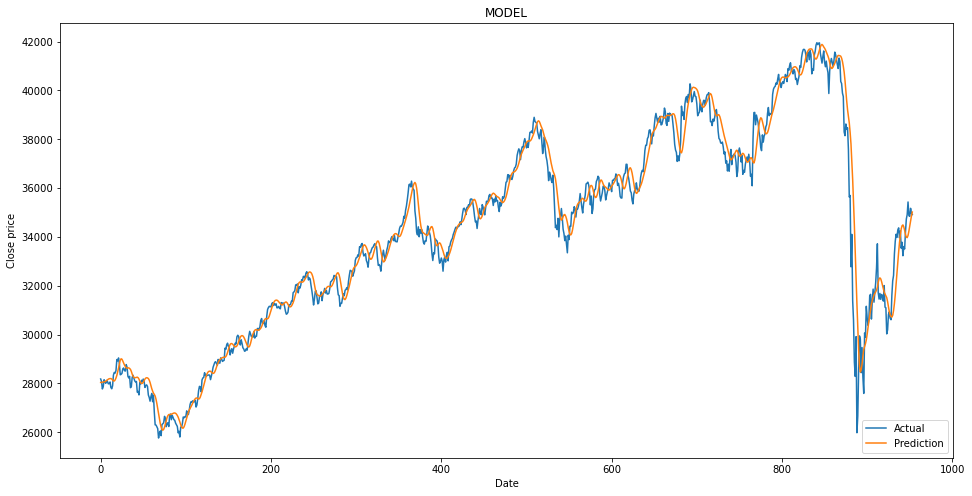

In [52]:
plt.figure(figsize=(16, 8))
plt.title("MODEL")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.plot(y_test)
plt.plot(prediction)
plt.legend(['Actual', 'Prediction'], loc='lower right')